In [40]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal
from numpy.random import choice
%matplotlib inline

[]

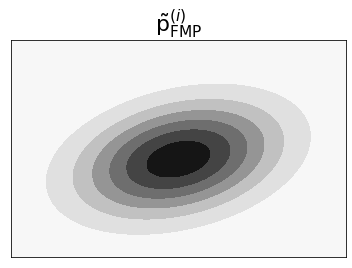

In [21]:
x, y = np.mgrid[-3:4:.01, -2:2:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos), cmap=cm.Greys)
ax2.set_title(r'$\tilde{\mathrm{p}}_\mathrm{FMP}^{(i)}$',fontsize=22)
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])


Text(0.5, 1.0, 'candidate set')

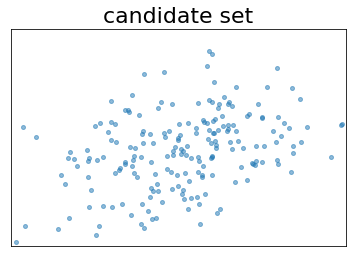

In [81]:
#afficher des draws de la densité.
rs=5565565
nsamples=200
s= rv.rvs(nsamples,random_state=rs)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(s[:,0],s[:,1],color='tab:blue',s=16,alpha=0.5)
ax2.set_xlim([-3,4])
ax2.set_ylim([-2,2])
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])

ax2.set_title(r'candidate set',fontsize=22)


Text(0.5, 1.0, 'selected set')

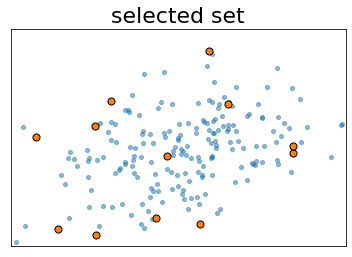

In [95]:
#et maintenant: calcul des poids avec comme critère, 1/ la distance au carré au centre (juste pour illustration)
def weight(x):
    mean=np.array([0.5, -0.2])
    return np.linalg.norm(x-mean)
rs2=5585474
weights=[weight(m) for m in s]
nbnewpoints=12
#draw n'accepte que les arrays 1D.. Il faut tirer parmi les entiers.
intarray=np.array(range(np.shape(s)[0]))
weights/=np.sum(weights)
draw = choice(intarray, nbnewpoints,p=weights,replace=False)
#print(draw)
drawn=np.array([s[i] for i in draw])
#print(drawn)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(s[:,0],s[:,1],color='tab:blue',s=16,alpha=0.5)
ax2.scatter(drawn[:,0],drawn[:,1],edgecolors='black',s=50,color='tab:orange')
ax2.set_xlim([-3,4])
ax2.set_ylim([-2,2])
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])

ax2.set_title(r'selected set',fontsize=22)
